In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7, stratify = y)

print('Class labels:', np.unique(y))
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # return 'self'
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=3)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=3, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred = ppn.predict(X_test_std)
(y_test != y_pred).sum()/len(y_test)

0.06666666666666667

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [7]:
ppn.score(X_test_std, y_test)

0.9333333333333333

In [8]:
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.show()

<Figure size 640x480 with 1 Axes>

## Modleing class probabilities via logistic regression

#### Some intuitions

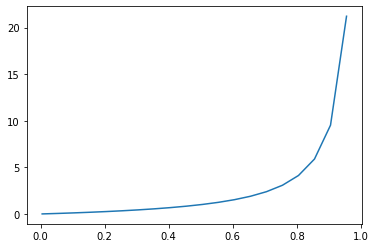

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
%matplotlib inline

x = np.arange(0.005, 1, 0.05)
y1 = x/(1-x)
plt.plot(x, y1) # p/(1-p)

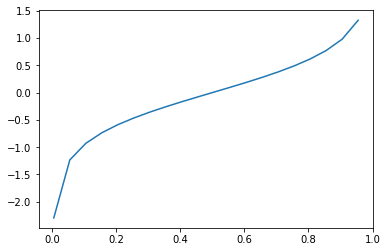

In [10]:
y2 = np.log10(x/(1-x))
plt.plot(x, y2) # log(p/(1-p))

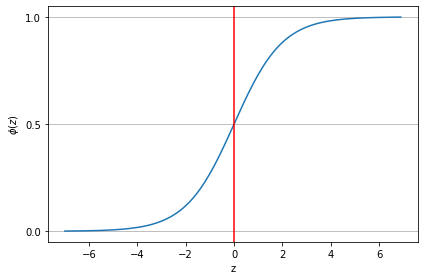

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0, color = 'r')
plt.ylim = (-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0, 0.5, 1])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

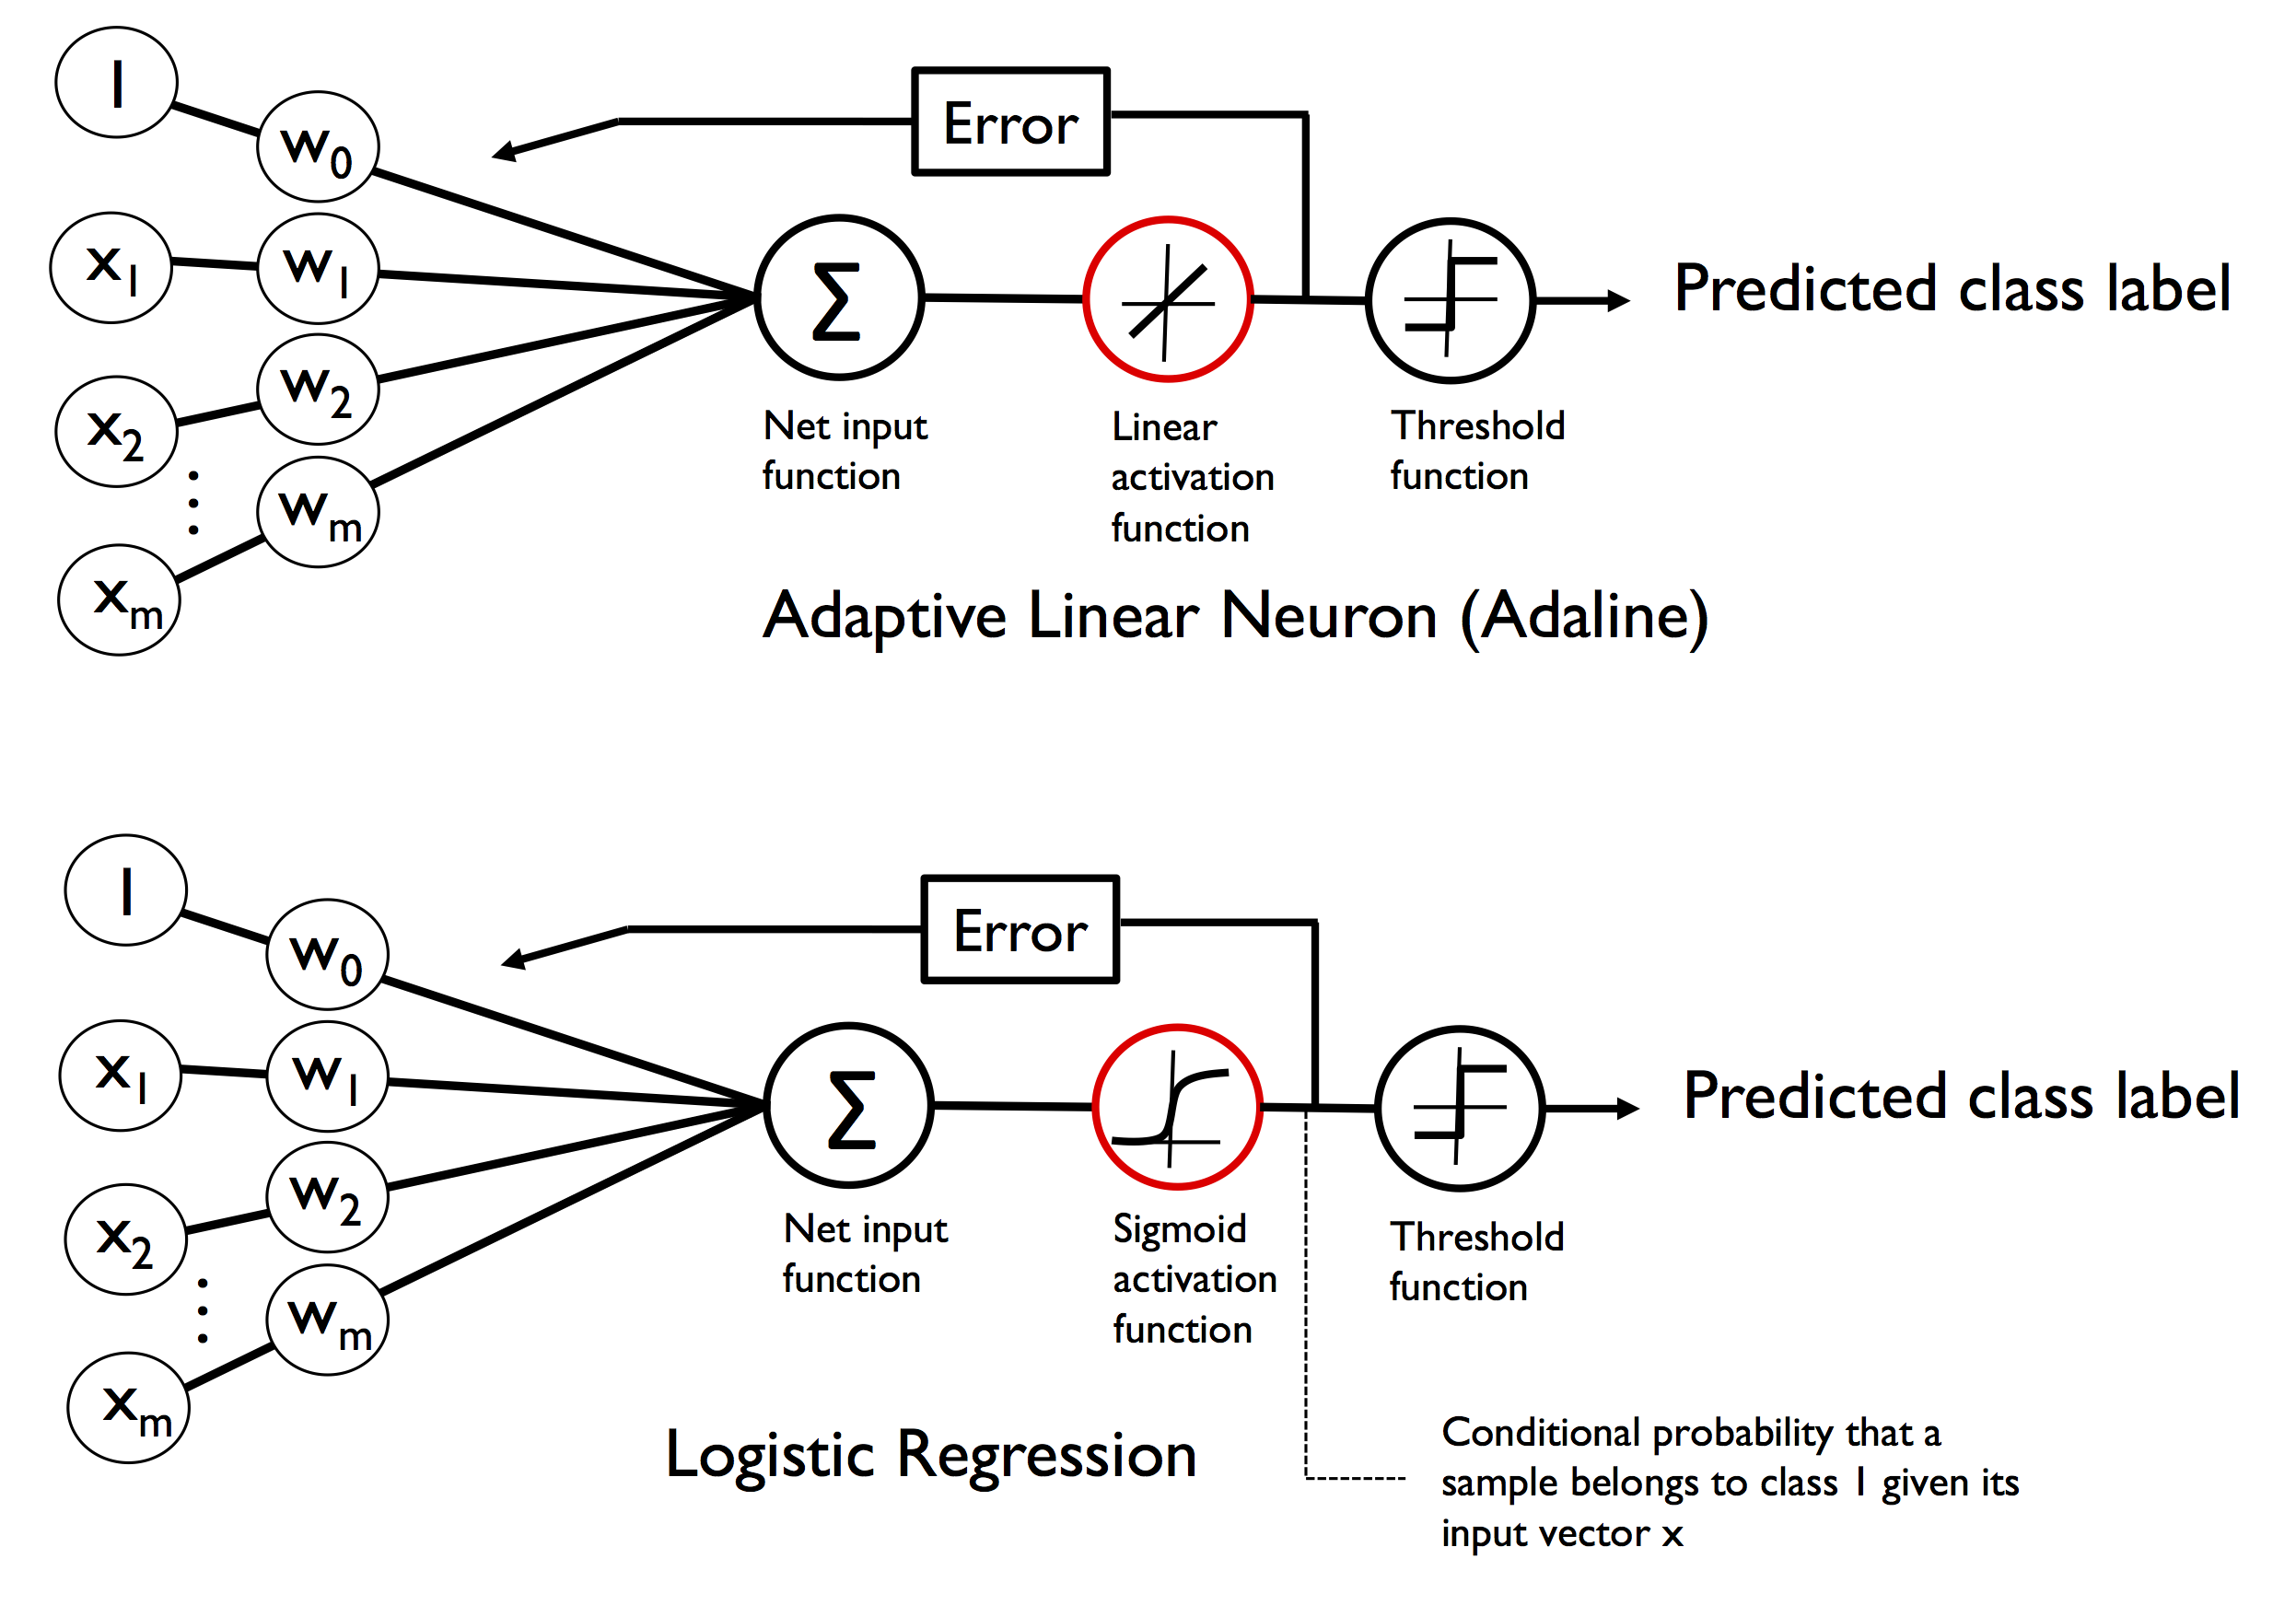

In [12]:
Image(filename='images/03_03.png', width = 500)

### Learning the weights of the logistic cost function

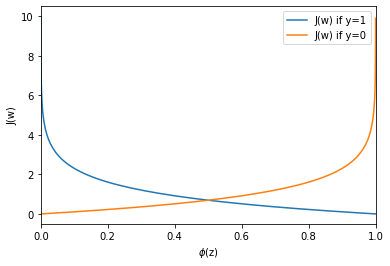

In [26]:
## it comes from likelihood function: P(y|x,W)
## since each sample is independent, it can be written a series of products
## p(y=1|x,W) = 1/(1+e^(-z)) = phi_z
## so p(y_i|x_i,W) = (phi_z_i)^y_i * (1-phi_z_i)^(1-y_i)
## after taking log, we have a series of summation.

## one instance: 
## min(-y(i)*log(phi_z(i)) - (1-y(i))log(1-phi_z(i)))
## phi_z = sigmoid(z)
## when y=0, phi_z needs to be close to 0 to minimize the obj function
## when y=1, phi_z needs to be close to 1 to minimize the obj function

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
cost_1 = -np.log(phi_z)
cost_0 = -np.log(1-phi_z)

plt.plot(phi_z, cost_1, label = 'J(w) if y=1')
plt.plot(phi_z, cost_0, label = 'J(w) if y=0')
#plt.ylim(0, 5)
plt.xlim(0, 1)
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()